# Proyek Analisis Data: [Cleaned Air Quality Dataset]
- **Nama:** [Andi Adnan]
- **Email:** [adnanandi252@gmail.com]
- **ID Dicoding:** [andi_adnan_252]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara berdasarkan konsentrasi Karbon Monoksida (CO) dalam periode waktu tertentu?
- Bagaimana hasil pengukuran sulfur dikoksida berdasarkan statiun pengukuran di tahun 2016?
- Bagaimana hubungan antara faktor meteorologi (suhu, tekanan udara, kelembaban, curah hujan, arah dan kecepatan angin) dengan tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
folder = 'data'
files = glob.glob(os.path.join(folder, '*.csv'))
data = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
data.shape

(420768, 18)

**Insight:**
- Air Quality Dataset memiliki 18 atribut yang meliputi:
  - **No** : Nomor urut data
  - **year**: Tahun pengambilan data
  - **month**: Bulan pengambilan data
  - **day**: Hari pengambilan data
  - **hour**: Jam pengambilan data
  - **PM2.5**: Konsentrasi partikel udara dengan diameter ≤ 2.5 µm
  - **PM10**: Konsentrasi partikel udara dengan diameter ≤ 10 µm (µg/m³)
  - **SO2**: Sulfur Dioksida
  - **NO2**: Nitrogen Dioksida
  - **CO**: Karbon Monoksida
  - **O3**: Konsentrasi Ozon di udara
  - **TEMP**: Suhu udara dalam derajat Celcius (°C).
  - **PRES**: Tekanan udara saat pencatatan dalam hPa (hektopascal).
  - **DEWP**: Kelembaban.
  - **RAIN**: Curah hujan dalam mm
  - **wd**: Arah angin saat pencatatan dalam bentuk kompas (misalnya NNW = North-Northwest).
  - **WSPM**: Kecepatan angin dalam meter per detik (m/s).
- Jumlah data setelah menggabungkan hasil pencatatan dari 12 statiun mencapai 420.768 baris.

### Assessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
data.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
print("Jumlah data duplikat: ", data.duplicated().sum())

Jumlah data duplikat:  0


In [7]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Dari ke 18 atribut dalam dataset, 11 atribut bertipe float, 5 bertipe int, dan 2 sisanya bertipe object.
- Terdapat banyak nilai yang hilang (missing values) dalam dataset.
- Tidak ada baris data yang teridentifikasi duplikat.

### Cleaning Data

In [ ]:
# Penanganan missing values untuk atribut numerik menggunakan metode interpolasi
data.interpolate(method='linear', inplace=True)

In [ ]:
# Penanganan missing values pada kolom 'wd' dengan modus (nilai yang paling sering muncul)
mode_wd = data['wd'].mode()[0]
data['wd'].fillna(mode_wd, inplace=True)

In [10]:
data.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Missing values untuk data bertipe numerik ditangani dengan metode imputasi interpolasi. Metode ini digunakan karena cocok untuk jenis data timeseries seperti dataset Air Quality.
- Sementara itu, untuk menangani nilai yang hilang pada atribut bertipe kategori dalam hal ini ialah **wd** (Arah Mata Angin), digunakan metode imputasi berdasarkan nilai modus atau nilai yang paling sering muncul.
- Tidak ada baris duplikat yang teridentifikasi dalam dataset ini, sehingga tidak perlu dilakukan penanganan lain.
- Tidak ada pula nilai dalam dataset yang teridentifikasi sebagai kesalahan input (Inacurate Data), sehingga tidak membutuhkan penanganan dalam proses cleaning.

## Exploratory Data Analysis (EDA)

In [11]:
data.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204369,29050,2016,6,23,9,137.0,137.0,3.0,69.0,1200.0,72.0,27.2,996.7,20.8,0.0,N,1.2,Gucheng
392424,6721,2013,12,6,0,89.0,146.0,55.0,61.0,1800.0,1.0,0.1,1014.9,-7.9,0.0,W,0.7,Wanshouxigong
223010,12627,2014,8,9,2,103.0,114.0,5.0,33.0,1500.0,86.0,20.5,998.5,17.1,0.0,WNW,1.1,Huairou
344975,29400,2016,7,7,23,68.0,84.0,12.0,46.0,1100.0,56.0,28.5,1005.9,19.2,0.0,SSE,1.9,Tiantan
418388,32685,2016,11,21,20,11.0,22.0,4.0,21.0,300.0,49.0,-2.7,1032.7,-16.1,0.0,NW,4.3,Wanshouxigong


In [12]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [13]:
# Menambahkan kolom musim (China adalah negara dengan 4 musim)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['season'] = data['month'].apply(get_season)

In [14]:
# Pivot table untuk melihat rata-rata indeks pencemaran di udara berdasarkan musim dan bulan
seasonal_trend = data.pivot_table(values=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], index=['season', 'month'], aggfunc='mean')
seasonal_trend

CO        NO2         O3        PM10       PM2.5  \
season month                                                              
Autumn 9       926.963274  45.333194  54.914020   79.481882   61.281071   
       10     1156.714347  59.723231  29.731130  112.298829   91.715859   
       11     1670.353764  61.694727  19.441535  118.084554   93.323963   
Spring 3      1310.173191  59.981914  50.748473  136.718417   94.594295   
       4       838.221750  47.725344  70.216093  117.304974   73.367153   
       5       808.859847  42.752848  92.511020  108.480401   63.541148   
Summer 6       982.397803  39.070531  94.854305   86.613679   68.837547   
       7       905.976696  35.653757  96.329628   84.700310   71.401115   
       8       831.274478  35.893115  87.886086   71.464460   53.465479   
Winter 1      1867.140364  61.318645  27.375438  113.402751   93.760559   
       2      1416.448500  51.668084  40.435918  104.625065   89.213391   
       12     2112.774621  66.205301  21.258207  125.136915  103.679184   

                    SO2  
season month             
Autumn 9       6.290065  
       10      8.671746  
       11     15.293329  
Spring 3      27.960784  
       4      14.223826  
       5      14.582787  
Summer 6       7.903589  
       7       5.521875  
       8       4.683461  
Winter 1      31.519823  
       2      29.061615  
       12     25.767307

In [15]:
# Pivot table untuk melihat rata-rata indeks pencemaran di udara berdasarkan stasiun pengukuran
station_trend = data.pivot_table(values=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'], index='station', aggfunc='mean')
station_trend

,CO,NO2,O3,PM10,PM2.5,SO2
station,,,,,,
Aotizhongxin,1264.692405,59.074106,55.328626,110.210033,82.540623,17.459251
Changping,1156.990246,44.206153,57.976253,94.788575,70.986438,14.943066
Dingling,925.111838,27.304331,70.530792,84.113713,66.845557,11.797849
Dongsi,1331.913045,53.953078,57.700357,110.347617,86.144243,18.506142
Guanyuan,1258.327045,58.139298,54.817142,109.372349,82.897522,17.609312
Gucheng,1338.100060,55.836004,58.000001,119.261567,84.074802,15.705821
Huairou,1019.671871,32.077275,60.872173,92.422670,69.501747,12.446681
Nongzhanguan,1327.767611,58.095053,58.432876,109.384022,85.079472,18.760102
Shunyi,1197.904660,44.094695,54.218810,99.271936,79.437962,13.445971


In [16]:
# Menampilkan data saat kondisi pencemaran udara mencapai maksimum
max_pollutants = data.loc[[data['PM2.5'].idxmax(), data['PM10'].idxmax(), data['SO2'].idxmax(), 
                           data['NO2'].idxmax(), data['CO'].idxmax(), data['O3'].idxmax()]]
print("Data saat kondisi pencemaran udara mencapai maksimum:")
max_pollutants

Data saat kondisi pencemaran udara mencapai maksimum:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
411482,25779,2016,2,8,2,999.000000,634.5,299.0,82.0,2700.0,6.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Wanshouxigong,Winter
42951,7888,2014,1,23,15,234.333333,999.0,137.0,122.0,3800.0,10.0,3.2,1004.1,-13.2,0.0,SE,1.5,Changping,Winter
185872,10553,2014,5,14,16,19.000000,35.0,500.0,21.0,300.0,74.0,22.3,995.9,0.1,0.0,WNW,0.6,Gucheng,Spring
23036,23037,2015,10,16,20,312.000000,342.0,14.0,290.0,5800.0,11.0,15.6,1013.1,13.1,0.0,E,1.0,Aotizhongxin,Autumn
24126,24127,2015,12,1,6,453.000000,453.0,31.0,184.0,10000.0,10.0,-0.8,1015.9,-1.4,0.0,ESE,0.6,Aotizhongxin,Winter
109223,4032,2013,8,15,23,195.000000,206.0,6.0,40.0,1600.0,1071.0,29.5,995.6,25.3,2.2,SSE,3.3,Dongsi,Summer


In [17]:
# Menampilkan data saat kondisi pencemaran udara mencapai minimum
min_pollutants = data.loc[[data['PM2.5'].idxmin(), data['PM10'].idxmin(), data['SO2'].idxmin(), 
                           data['NO2'].idxmin(), data['CO'].idxmin(), data['O3'].idxmin()]]
print("\nData saat kondisi pencemaran udara mencapai minimum:")
min_pollutants


Data saat kondisi pencemaran udara mencapai minimum:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
36230,1167,2013,4,18,14,2.0,7.0,0.2856,1.8477,200.0000,100.8882,15.4,1011.5,-16.1,0.0,SSW,2.4,Changping,Spring
3723,3724,2013,8,3,3,13.0,2.0,3.0000,35.0000,400.0000,6.0000,22.5,997.2,18.3,0.0,S,0.7,Aotizhongxin,Summer
2783,2784,2013,6,24,23,37.0,9.0,0.2856,64.0536,1339.0625,59.9760,20.8,996.8,20.3,0.0,N,0.6,Aotizhongxin,Summer
76225,6098,2013,11,10,1,12.0,29.0,0.8568,1.0265,1500.0000,69.6150,1.9,1025.0,-23.7,0.0,NNW,4.5,Dingling,Autumn
3302,3303,2013,7,16,14,10.0,11.0,3.0000,15.0000,100.0000,86.0000,33.5,995.2,13.5,0.0,N,2.9,Aotizhongxin,Summer
1005,1006,2013,4,11,21,38.0,100.0,9.0000,109.0000,1100.0000,0.2142,7.1,1012.2,-4.4,0.0,N,0.2,Aotizhongxin,Spring


In [18]:
# Menampilkan korelasi antar atribut numerik
new_data = data.drop(columns=['No', 'wd', 'station', 'season'])
correlation = new_data.corr()
correlation

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.026070,-0.039717,-0.170455,-0.055492,0.007489,-0.013782,-0.152312,0.187214,-0.165189,0.000894,0.087666
month,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,0.006540,-0.029467,-0.214820,0.036341,0.046000,-0.105752,0.132502,-0.013835,0.266779,0.016136,-0.139920
day,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.005445,0.027416,-0.001980,0.012384,-0.015630,-0.000510,0.014219,0.021971,0.022988,-0.003716,-0.011426
hour,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.011129,0.049566,0.028943,-0.001783,-0.031367,0.277433,0.142173,-0.038464,-0.011966,0.012371,0.140396
PM2.5,-2.606991e-02,6.539506e-03,5.445498e-03,1.112889e-02,1.000000,0.878874,0.478223,0.664306,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,-0.271425
PM10,-3.971735e-02,-2.946699e-02,2.741647e-02,4.956631e-02,0.878874,1.000000,0.460572,0.645583,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,-0.178200
SO2,-1.704546e-01,-2.148197e-01,-1.980077e-03,2.894252e-02,0.478223,0.460572,1.000000,0.495826,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,-0.108536
NO2,-5.549204e-02,3.634103e-02,1.238374e-02,-1.783158e-03,0.664306,0.645583,0.495826,1.000000,0.694036,-0.465912,-0.277279,0.176652,-0.032569,-0.043665,-0.395699
CO,7.488632e-03,4.599987e-02,-1.562982e-02,-3.136714e-02,0.780165,0.691887,0.522678,0.694036,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,-0.290413
O3,-1.378214e-02,-1.057525e-01,-5.097042e-04,2.774333e-01,-0.149508,-0.110443,-0.165311,-0.465912,-0.306979,1.000000,0.592248,-0.446725,0.312980,0.023361,0.294351


In [19]:
# Simpan data untuk dashboard
data.to_csv('dashboard/cleaned_air_quality_data.csv', index=False)

**Insight:**
- Nilai rata-rata hasil pengukuran berdasarkan bulan, yaitu sebagai berikut:
    - **CO** paling tinggi di bulan **Desember** dan terendah di bulan **Mei**
    - **NO2** paling tinggi di bulan **Desember** dan terendah di bulan **Februari**
    - **PM2.5** tertinggi di bulan **Desember** dan terendah di bulan **Agustus**
    - **PM10** tertinggi di **Maret** dan terendah di **Agustus**
    - **SO2** tertinggi di **Januari** dan terendah di **Agustus**
    - **03** tertinggi di **Juli** dan terendah di **November**
  Secara umum bulan Desember diidentifikasi memiliki angka kualitas udara dengan jumlah polutan yang terukur sangat tinggi.
- Beberapa variabel kondisi lingkungan dan cuaca memiliki korelasi yang kuat dengan hasil pengukuran kualitas udara. Misalnya korelasi antara **TEMP** dan **NO2** (-0.40) atau antara **TEMP** dan **O3** (0.59).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipykernel_11346/2038826279.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = data.groupby(['year', 'month'])['CO'].mean().reset_index()


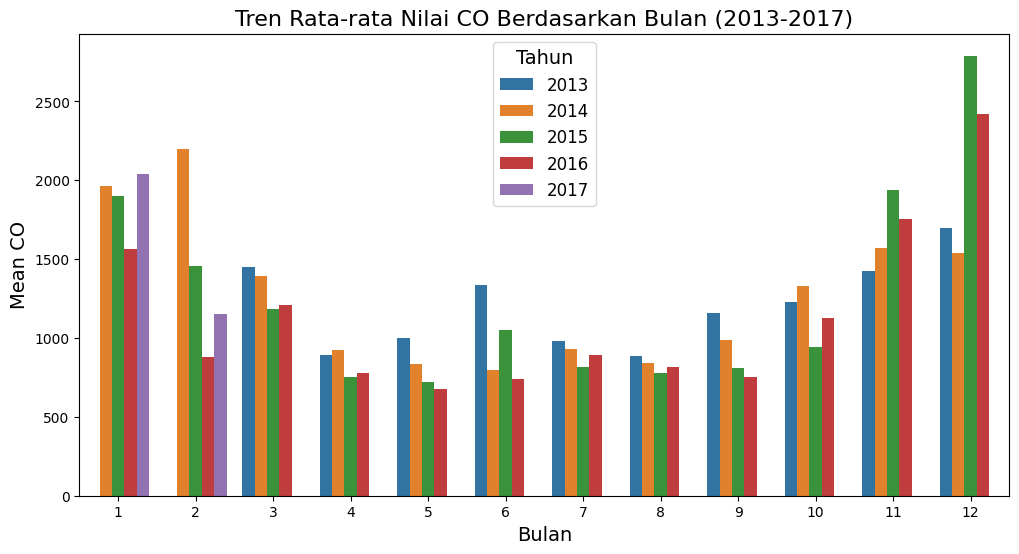

In [48]:
# Menampilkan Tren nilai rata-rata CO berdasarkan bulan (2013-2017)
data['year'] = pd.Categorical(data['year'], categories=[2013, 2014, 2015, 2016, 2017], ordered=True)

monthly_trend = data.groupby(['year', 'month'])['CO'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_trend, x='month', y='CO', hue='year', palette='tab10', hue_order=[2013, 2014, 2015, 2016, 2017])

plt.title('Tren Rata-rata Nilai CO Berdasarkan Bulan (2013-2017)', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Mean CO', fontsize=14)
plt.legend(title='Tahun', fontsize=12, title_fontsize=14)
plt.xticks(np.arange(12), labels=np.arange(1, 13))

plt.show()

/tmp/ipykernel_11346/1485939491.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_trend = data.groupby('year')['CO'].mean().reset_index()
/tmp/ipykernel_11346/1485939491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=yearly_trend, x='year', y='CO', palette='tab10')


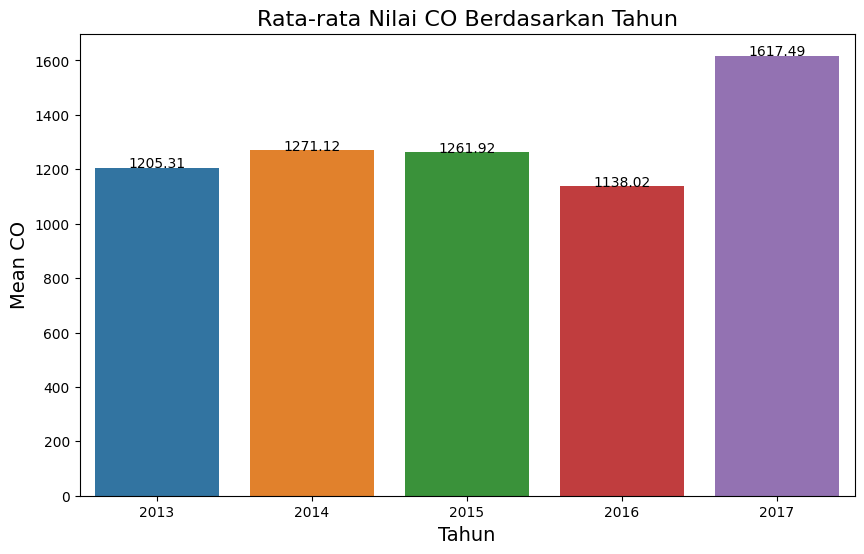

In [ ]:
# Menampilkan Tren nilai rata-rata CO berdasarkan tahun
yearly_trend = data.groupby('year')['CO'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=yearly_trend, x='year', y='CO', palette='tab10')

for i, row in yearly_trend.iterrows():
    ax.text(i, row['CO'] + 0.2, f'{row["CO"]:.2f}', ha='center', fontsize=10)

plt.title('Rata-rata Nilai CO Berdasarkan Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Mean CO', fontsize=14)

plt.show()

### Pertanyaan 2:

/tmp/ipykernel_11346/2234456424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=so2_station_2016, x='station', y='SO2', palette='viridis')


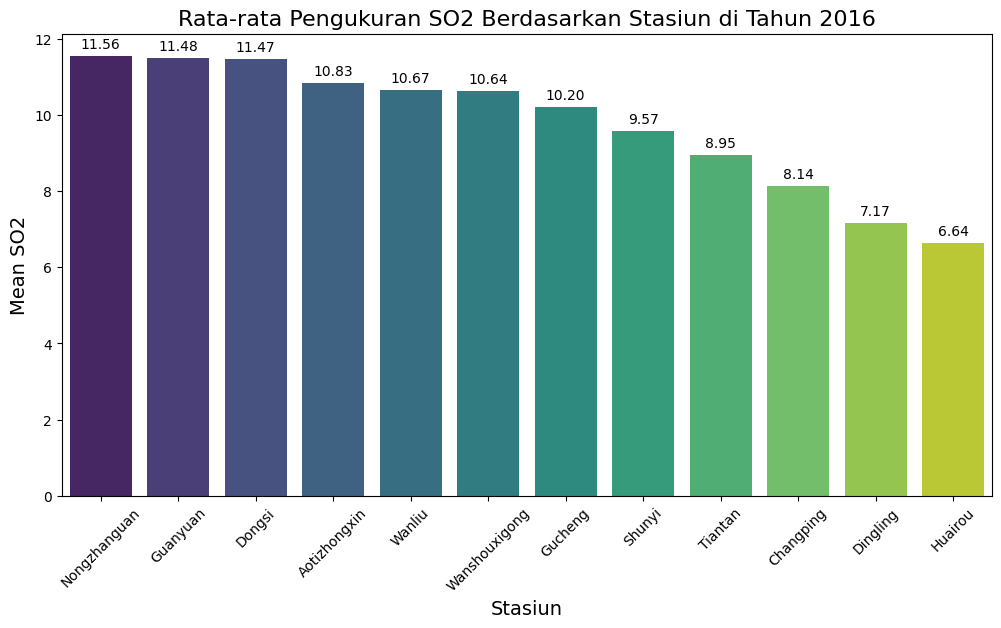

In [ ]:
# Menampilkan rata-rata pengukuran SO2 berdasarkan stasiun di tahun 2016
data_2016 = data[data['year'] == 2016]

so2_station_2016 = data_2016.groupby('station')['SO2'].mean().reset_index()
so2_station_2016 = so2_station_2016.sort_values(by='SO2', ascending=False)  # Urutkan dari tinggi ke rendah

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=so2_station_2016, x='station', y='SO2', palette='viridis')

for i, row in enumerate(so2_station_2016.itertuples()):
    ax.text(i, row.SO2 + 0.2, f'{row.SO2:.2f}', ha='center', fontsize=10)

plt.title('Rata-rata Pengukuran SO2 Berdasarkan Stasiun di Tahun 2016', fontsize=16)
plt.xlabel('Stasiun', fontsize=14)
plt.ylabel('Mean SO2', fontsize=14)
plt.xticks(rotation=45)

plt.show()

### Pertanyaan 3:

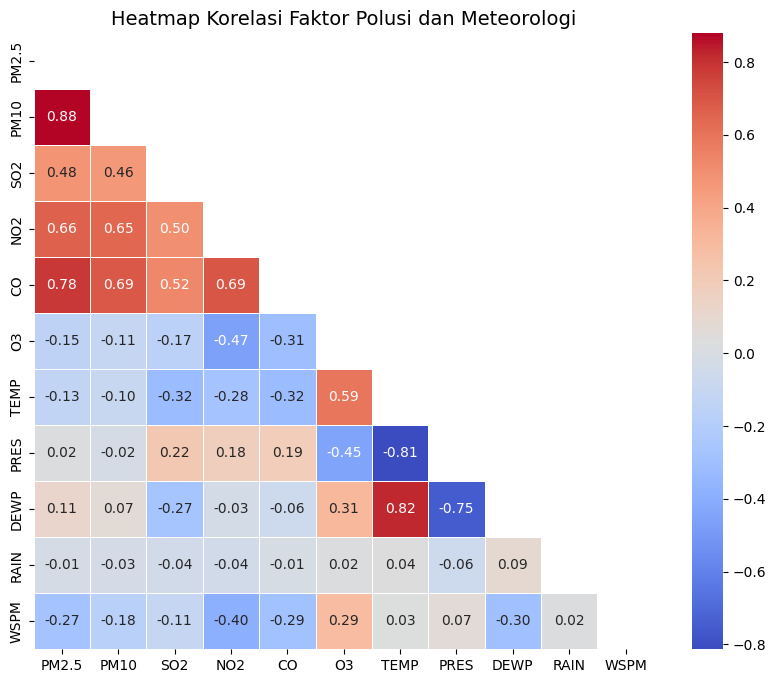

In [ ]:
#  Menampilkan heatmap korelasi antara variabel faktor polusi dan meteorologi
selected_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

corr_matrix = data[selected_columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap Korelasi Faktor Polusi dan Meteorologi', fontsize=14)

plt.show()

**Insight:**
- **Pertanyaan 1**: Tidak ada pola penurunan atau kenaikan nilai rata-rata karbon monoksida berdasarkan bulan dari tahun ke tahun. Semua bulan bergerak naik turun tanpa pola yang pasti. Kecuali untuk bulan **Mei** dan **September** yang konsisten mengalami penurunan sejak tahun 2013-2016. Sementara itu, nilai rata-rata karbon monoksida di udara jika dihitung berdasarkan tahun juga tidak mengalami perubahan yaang signifikan. Tahun 2017 terlihat memiliki kenaikan yang cukup jauh, namun ini karena data yang tersedia pada tahun ini hanya sampai bulan Februari.
- **Pertanyaan 2**: 3 statiun dengan rata-rata pengukuran sulfur dioksida tertinggi adalah Nongzhanguan (11.56), Guanyuan (11.48), dan Dongsi (11.47). Sementara itu, 3 statiun dengan hasil pengukuran terendah adalah Huairou (6.64), Dingling (7.17), dan Changping (8.14). Perbedaan ini menunjukkan kemungkinan tinggi rendah konsentrasi sulfur dioksida yang terukur di udara bergantung pada kondisi lokasinya. Misalnya antara pusat kota dan daerah pinggiran.
- **Pertanyaan 3**: Suhu (TEMP) memiliki korelasi negatif dengan polutan (PM2.5, PM10, SO2, NO2, CO) yang menunjukkan bahwa peningkatan suhu cenderung menurunkan konsentrasi polutan di udara. Tekanan udara (PRES) berkorelasi positif lemah dengan SO2, NO2, dan CO tapi negatif dengan O3. O3 menunjukkan hubungan sangat kuat dengan faktor lingkungan, dibuktikan dengan korelasi positif yang cukup tinggi dengan TEMP, DEWP, dan WSPM serta berkorelasi negatif kuat dengan PRES.

## Analisis Lanjutan (Opsional)

In [ ]:
# Tidak ada analisis lanjutan

## Conclusion

- Conclusion Pertanyaan 1: **Tren Rata-Rata Nilai Karbon Monoksida** <br>
Tidak ada pola yang konsisten dalam perubahan konsentrasi CO dari tahun ke tahun, kecuali untuk bulan Mei dan September yang menunjukkan penurunan konsisten selama 2013-2016. Fluktuasi nilai CO yang tidak memiliki tren signifikan menunjukkan bahwa faktor penyebab polusi CO mungkin bervariasi dan tidak terikat pada pola musiman yang kuat.
    - Saran:
        - Lakukan analisis lebih mendalam untuk bulan Mei dan September untuk mengidentifikasi faktor-faktor yang berkontribusi pada penurunan konsisten CO.
- Conclusion Pertanyaan 2: **Hasil Pengukuran SO2 Berdasarkan Stasiun Pengukuran Tahun 2016** <br>
Terdapat perbedaan signifikan dalam konsentrasi SO2 antar stasiun pengukuran, dengan stasiun di area yang kemungkinan besar merupakan pusat kota (Nongzhanguan, Guanyuan, Dongsi) menunjukkan nilai tertinggi, sementara area yang kemungkinan merupakan pinggiran kota (Huairou, Dingling, Changping) menunjukkan nilai terendah.
    - Saran:
        - Terapkan strategi pengendalian polusi di wiayah statiun pengkuran dengan nilai rendah (Huairou) dengan pada wilayah-wilayah yang tercatat memiliki nilai tinggi.
        - Lakukan pemetaan spasial untuk mengidentifikasi sumber-sumber emisi SO2 utama di sekitar stasiun dengan nilai tinggi.
        - Gunakan stasiun dengan nilai rendah sebagai percontohan untuk meningkatkan kualitas udara di area lain.

- Conclusion Pertanyaan 3: **Hubungan Faktor Meteorologi dengan Tingkat Polusi Udara** <br>
Terdapat korelasi yang signifikan antara kondisi meteorologi dan konsentrasi polutan. Suhu berkorelasi negatif dengan kebanyakan polutan (PM2.5, PM10, SO2, NO2, CO), menunjukkan bahwa polutan cenderung menurun saat suhu meningkat. O3 menunjukkan hubungan berbeda, dengan korelasi positif terhadap suhu dan beberapa faktor meteorologi lainnya.
    - Saran:
        - Integrasikan prakiraan meteorologi ke dalam sistem peringatan kualitas udara untuk mengantisipasi kondisi polusi tinggi.
        - Kembangkan strategi khusus untuk pengendalian O3 selama periode suhu tinggi, karena keduanya memiliki korelasi positif yang kuat.
